# Bernstein-Vazirani Algorithm

## 1 Bernstein-Vazirani Algorithm   
Deutsch-Jozsa algorithm의 확장판    

### 1.1 The Bernstein-Vazirani Problem
비트 스트링을 입력으로 받고 출력값이 0또는 1인 함수 f에 대해서 constant인지 balance인지 결정하는 대신    
비트 곱을 문자열 s와 함께 리턴해준다   
f(x) = s * x ( mod 2 )    

### 1.2 고전적 해결방법
입력된 비트스트링의 한 문자를 si라고 한다면 n번 함수를 호출함으로써 si를 결정

### 1.3 양자 해결법
양자 컴퓨터는 함수를 단 한번 호출함으로써 문제를 해결 할 수 있다

1) input 큐빗을 |0>상태로 초기화 하고 output을 |->상태로 초기화 시킨다
2) input 레지스터에 H게이트를 적용시킨다
3) query 진행
4) input 레지스터에 H게이트 적용시켜 원상복귀
5) 측정


## 2 예제
n = 2 이고 s = 11일 경우   
1) 2큐빗짜리 레지스터를 |00>으로 초기화
2) H게이트 적용   
-> 1/2(|00> + |01> + |10> + |11>)   
3) s에 대해서 연산   
-> |x>에 fs 적용 -> (-1)^(x * 11)|x>   
-> 1/2(|00> - |01> - |10> + |11>) 아마 bitwise하는듯?   
4) H게이트 적용   
-> |11>   
5) s=11인 것을 찾음

## 3 qiskit 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister,transpile

from qiskit.visualization import plot_histogram

In [3]:
n = 3
s = '011' # 숨겨진 이진 문자열


/tmp/ipykernel_105/4058587315.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  bv_circuit.i(q)


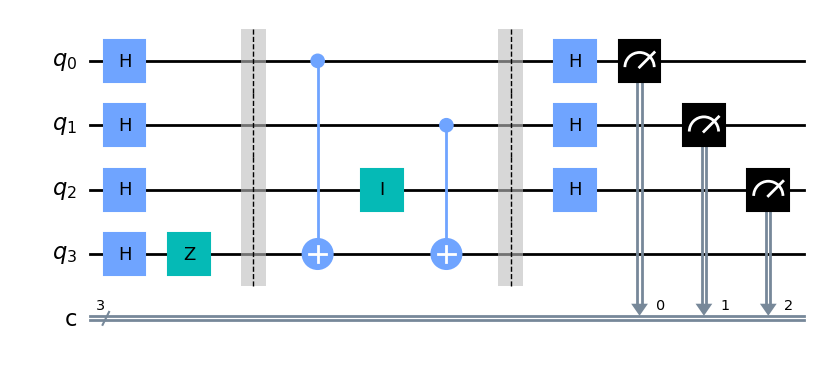

In [7]:
# n qubit 과 1개의 보조 qubit, output용 n bit classical qubit 필요
bv_circuit = QuantumCircuit(n+1,n)

#보조 비트의 상태를 |->로 설정
bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

#내적 oracle 적용
s = s[::-1] # qiskit은 bit가 반대로 나오기 때문에 s를 뒤집어 줌
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q,n)
        
bv_circuit.barrier()

#H게이트를 가해서 원상복귀
for i in range(n):
    bv_circuit.h(i)
    
#측정
for i in range(n):
    bv_circuit.measure(i,i)
    
bv_circuit.draw()

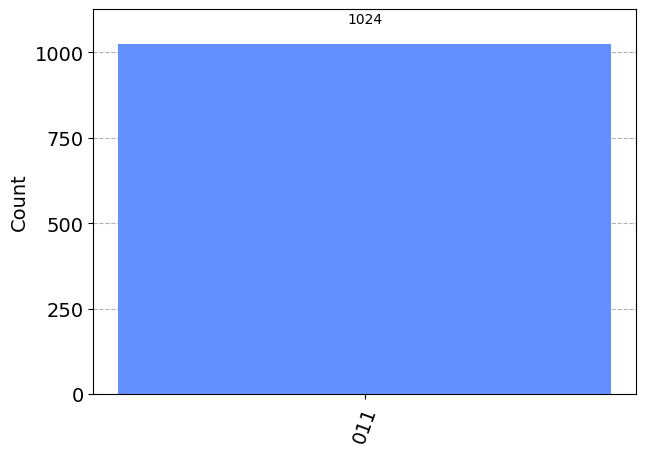

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
result = aer_sim.run(bv_circuit).result()
ans = result.get_counts()
plot_histogram(ans)

In [10]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print(backend)

ibmqfactory.load_account:WARNING:2024-02-15 05:42:22,500: Credentials are already in use. The existing account in the session will be replaced.


Traceback (most recent call last):
  Cell In[10], line 4
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/__init__.py:154 in least_busy
    raise IBMQError('Unable to find the least_busy '
IBMQError: 'Unable to find the least_busy backend from an empty list.'

Use %tb to get the full traceback.
